In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [28]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

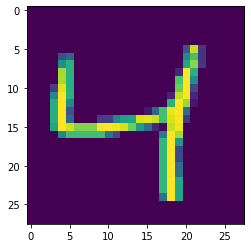

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [32]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [36]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2853 - val_loss: 0.1482
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1254 - val_loss: 0.1294
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0876 - val_loss: 0.0997
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0655 - val_loss: 0.1003
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0498 - val_loss: 0.0858
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0392 - val_loss: 0.0900
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0311 - val_loss: 0.0916
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0234 - val_loss: 0.0978
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0211 - val_loss: 0.0975
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.015

In [37]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [38]:
y_pred = y_prob.argmax(axis=1)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9762